## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Data Description**
The dataset consist of two columns are Quantitative Data (Continuous Data)

Scores: represent scores of students
Hours: the number of hours they studied

### **Import Libraries**

In [38]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

### **Loading Data**

In [39]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Exploratory Data Analysis**

In [40]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [41]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [42]:
s_data.corr().style.background_gradient(cmap='Blues')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Data Visualization**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

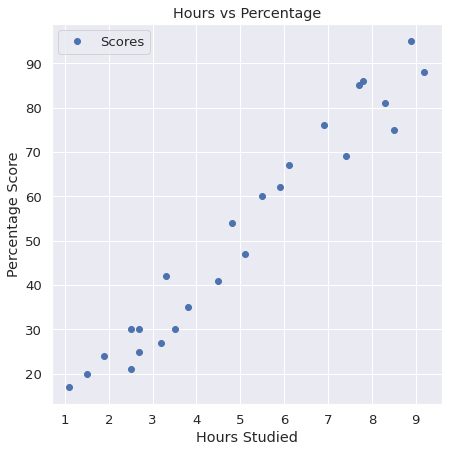

In [43]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

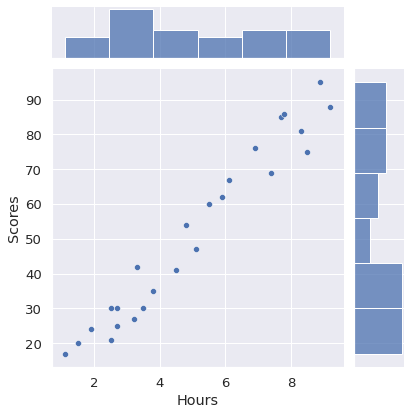

In [44]:
sns.jointplot(x='Hours', y='Scores', data=s_data)

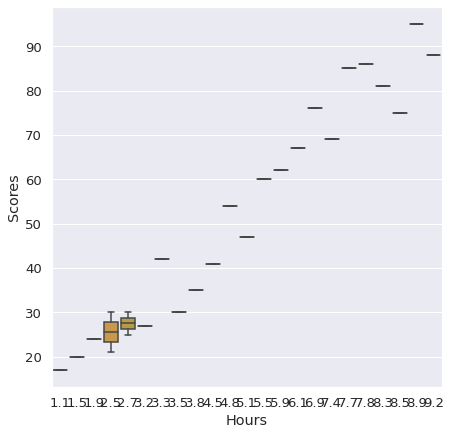

In [45]:
sns.boxplot(x='Hours', y='Scores', data=s_data)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [46]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [48]:
X_train.shape

(20, 1)

In [49]:
X_test.shape

(5, 1)

In [50]:
y_train.shape

(20,)

In [51]:
y_test.shape

(5,)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [52]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [55]:
y_test

array([20, 27, 69, 30, 62])

### **Calculate R2 Score**

In [56]:
model.score(X_train, y_train)

0.9515510725211552

In [57]:
model.score(X_test, y_test)

0.9454906892105354

### **Calculate Root Mean Square Error**

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_test, y_pred)

21.598769307217456

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.647447612100373

### **Test Model on  data**

In [61]:
model.predict([[7.5]])

array([76.34808365])

In [62]:
model.predict([[15]])

array([150.67800725])

### **Get Model Parameters**

In [63]:
model.coef_

array([9.91065648])

In [64]:
model.intercept_

2.018160041434662

### **Visualize Model**

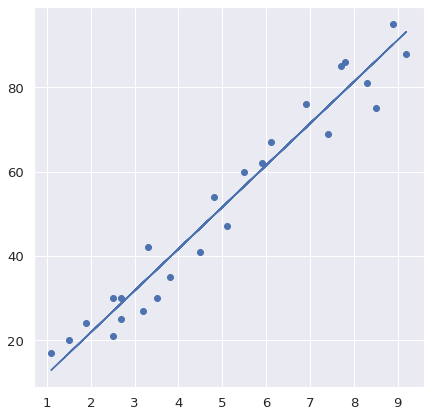

In [65]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

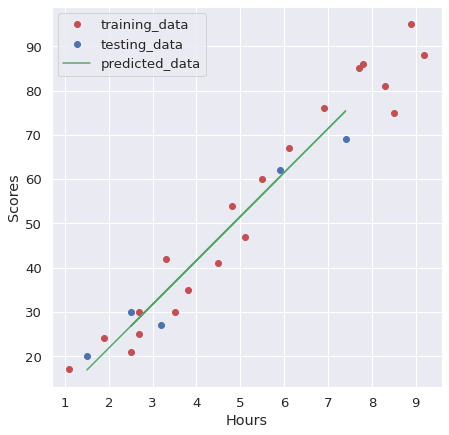

In [66]:
plt.plot(X_train, y_train, 'ro', label='training_data')
plt.plot(X_test, y_test, 'bo', label='testing_data')
plt.plot(X_test, y_pred, 'g-', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [67]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [68]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [69]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


### **Mohamed Samir -  Great Work**
